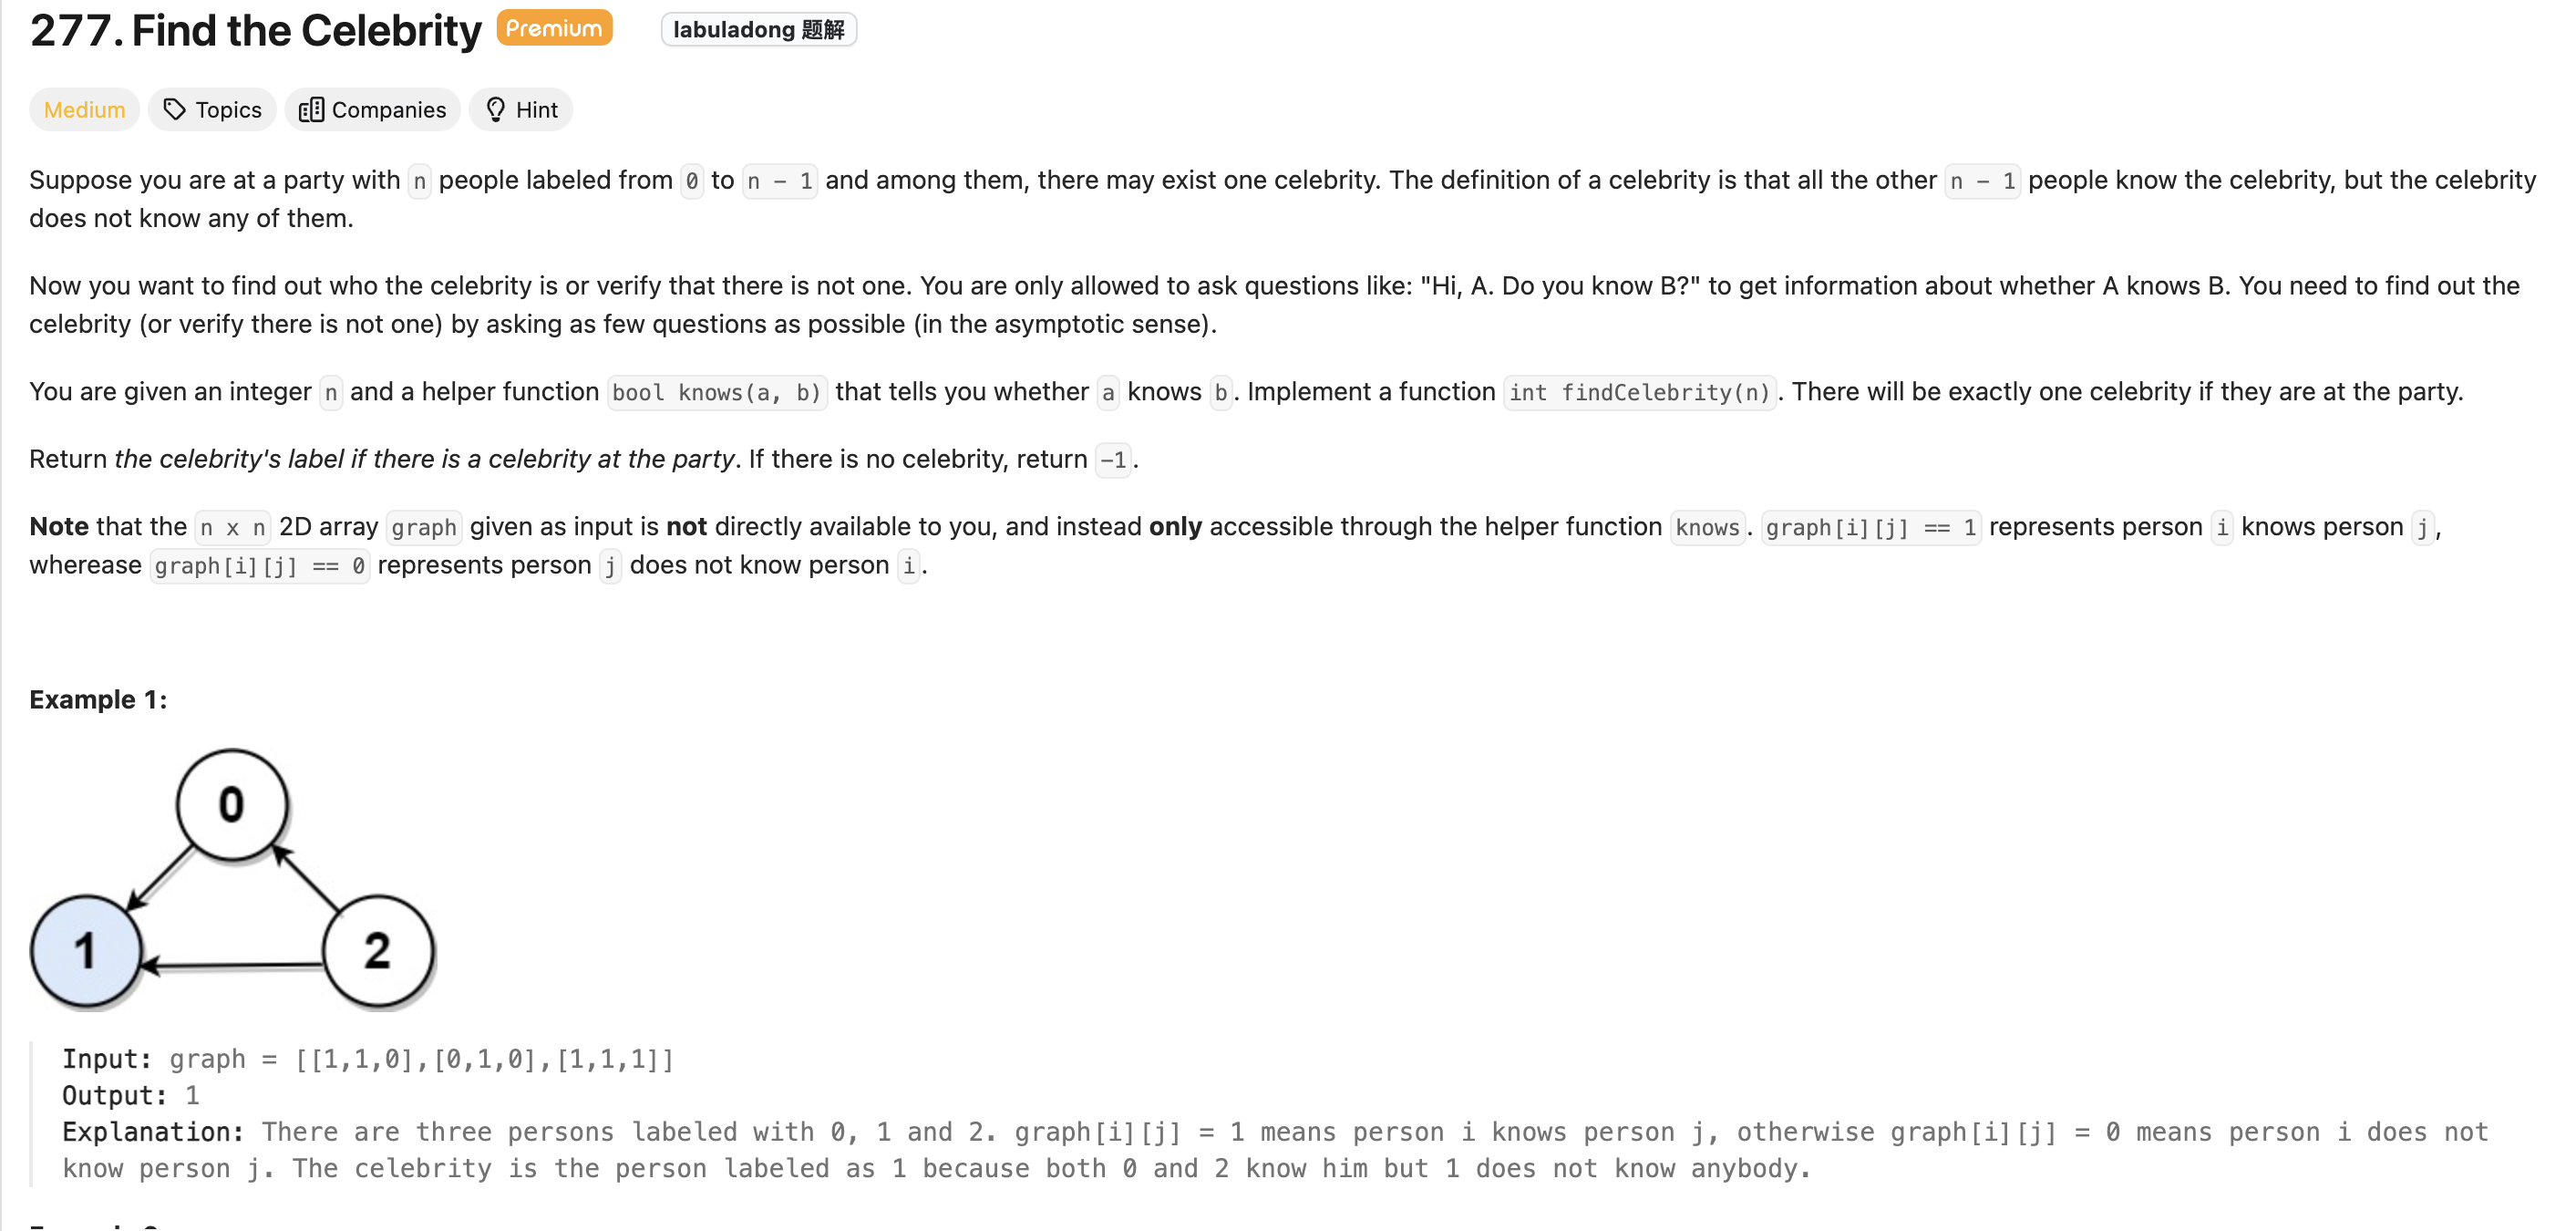

## 暴力解法

In [ ]:
# The knows API is already defined for you.
# Return a boolean indicating whether person `a` knows person `b`
# def knows(a: int, b: int) -> bool:

class Solution:
    def findCelebrity(self, n: int) -> int:
        # Iterate over each candidate to check if they might be the celebrity
        for cand in range(n):
            other = 0  # Start comparing the candidate with other people
            
            # Verify if `cand` satisfies the celebrity conditions:
            # 1. Everyone else should know `cand`
            # 2. `cand` should not know anyone else
            while other < n:
                # Skip self-comparison
                if cand == other:
                    other += 1
                    continue

                # If `cand` knows `other` or `other` doesn't know `cand`,
                # then `cand` cannot be a celebrity
                if knows(cand, other) or not knows(other, cand):
                    break

                # Move to the next person for verification
                other += 1

            # If `other` reaches `n`, it means all conditions for being a celebrity are met
            if other == n:
                return cand  # Return the celebrity's index

        # If no valid celebrity is found, return -1
        return -1


## 排除法

In [ ]:
# The knows API is already defined for you.
# Return a boolean indicating whether person `a` knows person `b`
# def knows(a: int, b: int) -> bool:


class Solution:
    def findCelebrity(self, n: int) -> int:

        # If there is only one person, that person is trivially the celebrity
        if n == 1:
            return 0

        # Step 1: Add all people to a queue as potential candidates
        q = collections.deque()
        for i in range(n):
            q.append(i)

        # Step 2: Narrow down to one candidate using elimination
        while len(q) > 1:
            # Pop two candidates from the queue to compare
            cand = q.popleft()
            other = q.popleft()

            # If `cand` knows `other` or `other` does not know `cand`:
            # `cand` cannot be a celebrity and is eliminated

            # Case1: cand knows other.
            # Since a celebrity should not know anyone else,
            # cand cannot be the celebrity and is eliminated.
            if knows(cand, other):
                q.appendleft(other)

            # Case2: other does not know cand
            # Since everyone should know celebrity
            # cand cannot be the celebrity and is eliminated.
            elif not knows(other, cand):
                q.appendleft(other)  # `other` may still be a potential candidate

            # Case3: cand does not know other & other knows cand
            # this makes cand can be a celebrity
            # and other is eliminated because he knows someone else, so other can't be celebrity
            else:
                q.appendleft(cand)  # `cand` may still be a potential candidate

        # Step 3: Now only one candidate remains; verify if they are truly a celebrity
        cand = q.popleft()

        # Check if all conditions are satisfied for the remaining candidate
        for other in range(n):
            if other == cand:
                continue

            # Verify that:
            # 1. Everyone else knows `cand`
            # 2. `cand` does not know anyone else
            if not knows(other, cand) or knows(cand, other):
                return -1  # Candidate fails the check and is not a celebrity

        # If all conditions are met, return the candidate's index
        return cand


### 排除法进阶

In [ ]:
# The knows API is already defined for you.
# Return a boolean indicating whether person `a` knows person `b`
# def knows(a: int, b: int) -> bool:


class Solution:
    def findCelebrity(self, n: int) -> int:

        # If there is only one person, that person is trivially the celebrity
        if n == 1:
            return 0

        cand = 0
        other = 1
        while other < n:
            
            #if cand knows other, it cant be celebrity
            if knows(cand, other): 
                #set cand to other, move other forward
                cand = other
                other += 1
            #one person dont know cand, cand cant be celebrity
            elif not knows(other, cand):
                #set cand to other, move other forward
                cand = other
                other += 1
            else:
                other += 1
        
        #check cand is celebrity
        for i in range(n):
            if i == cand:
                continue
            if knows(cand, i) or not knows(i, cand):
                return -1
        return cand